Første steget importere alle nødvendige libraries
Viktigaste for detnne fasen er 
h5py for å åpne h5py filene, numpy for å transformere data til array
og matplotlib for å plotte data til en bilde

In [1]:
import sys
import fastai
from pathlib import Path

Sette opp path 2 parent bak so vi kan hente metoder fra dataloader og plotcreator filene

In [2]:
module_path = str(Path.cwd().parents[0].parents[0] / "methods")

if module_path not in sys.path:
    sys.path.append(module_path)

from dataloader import *
from plotCreator import *

Legge til filene i variabelen fra deres respektive filene

In [3]:
data_path0 = str(Path.cwd().parents[0].parents[0] / "data" / "BH_n4_M10_res50_15000_events.h5")
data_path1 = str(Path.cwd().parents[0].parents[0] / "data" / "PP13-Sphaleron-THR9-FRZ15-NB0-NSUBPALL_res50_15000_events.h5")

Lage array fra data ved å utnytte metoden laget i dataloader

In [4]:
bhArray = dataToArray(data_path0)
sphArray = dataToArray(data_path1)

In [5]:
from fastai.vision.all import *

Lage datablocks frå data ved bruk av bidler som blokker og label som category returnerer datablock for videre bruk i vår vision learning metoden

In [6]:
def wrapper(image, lable):
    def pass_index(idx):
        return idx

    def get_x(i):
        return image[i]
    
    def get_y(i):
        return lable[i]

    db = DataBlock(
        blocks=(ImageBlock, CategoryBlock), 
        get_items = pass_index, 
        get_x = get_x, 
        get_y = get_y
    )

    num_images = image.shape[0]
    
    dls = db.dataloaders(list(range(num_images)),bs=64)
    

    return dls

In [7]:
#images
img = np.concatenate((bhArray, sphArray))

bhOnes = np.ones(len(bhArray))
sphZeros = np.zeros(len(sphArray))

#labels
label = np.concatenate((bhOnes, sphZeros))
imgNew = ((img - np.min(img)/(np.max(img)-np.min(img)))*255).astype(np.uint8)
dls = wrapper(imgNew, label)

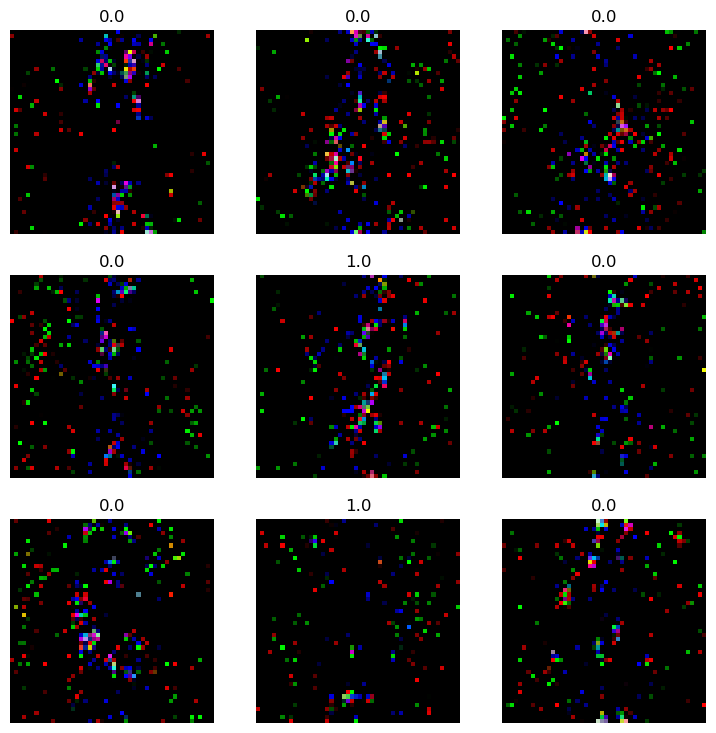

In [9]:
dls.show_batch(cmap='gray')

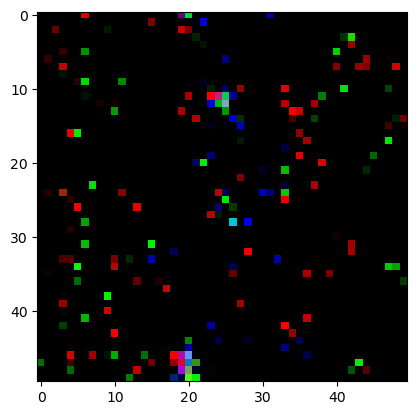

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


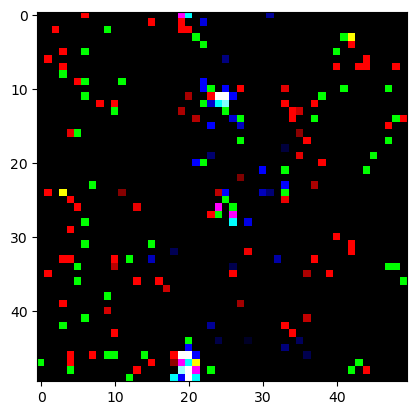

In [10]:
standardPlot(imgNew[1])
standardPlot(img[1])

Trene modellen vår

In [12]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")

Running on the GPU


In [13]:
# Create your learner object
learner = vision_learner(dls, resnet18, metrics=accuracy)
learner.fine_tune(5)
# Train your model on GPU
# device = torch.device('cuda:0')
# learner.model.to(device)


epoch,train_loss,valid_loss,accuracy,time
0,0.627800,0.621155,0.647000,00:33
1,0.588795,0.606507,0.661167,00:32
2,0.455334,0.697046,0.635333,00:32
3,0.140946,1.239279,0.633500,00:32
4,0.036810,1.437296,0.636000,00:33


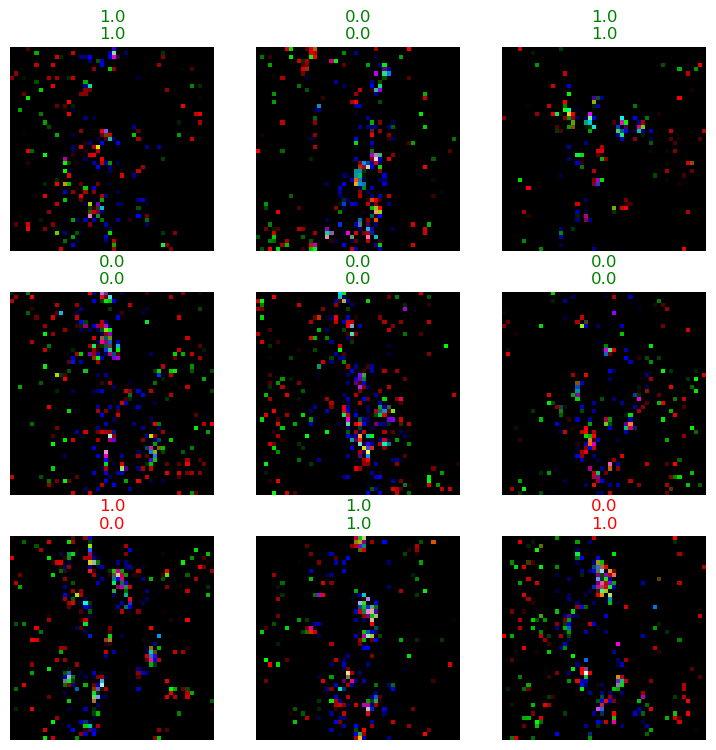

In [14]:
learner.show_results()